<a href="https://colab.research.google.com/github/SwordNoobOne/TelecomXParte1/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = '/content/TelecomX_Data.json'
df= pd.read_json(url)

In [44]:
display(df.head())
df.info()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


#🔧 Transformación

In [45]:
df_customer = pd.json_normalize(df['customer'])
df_account = pd.json_normalize(df['account'])
df_phone_services = pd.json_normalize(df['phone'])
df_internet_services = pd.json_normalize(df['internet'])

# Unir los dataframes aplanados en uno solo
# Add customerID and Churn from the original dataframe
df_clean = pd.concat([df[['customerID', 'Churn']], df_customer, df_account, df_phone_services, df_internet_services], axis=1)

# Reemplazar valores vacíos ('') en 'Churn' con NaN para poder eliminarlos fácilmente
#df_clean['Churn'] = df_clean['Churn'].replace('', np.nan)
#df_clean.dropna(subset=['Churn'], inplace=True)
#print(f"\nRegistros después de eliminar 'Churn' vacíos: {len(df_clean)}")

df_clean.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   Contract          7267 non-null   object 
 8   PaperlessBilling  7267 non-null   object 
 9   PaymentMethod     7267 non-null   object 
 10  Charges.Monthly   7267 non-null   float64
 11  Charges.Total     7267 non-null   object 
 12  PhoneService      7267 non-null   object 
 13  MultipleLines     7267 non-null   object 
 14  InternetService   7267 non-null   object 
 15  OnlineSecurity    7267 non-null   object 
 16  OnlineBackup      7267 non-null   object 


In [46]:
## 1. Revisión de valores nulos
print("1. VALORES NULOS POR COLUMNA:")
print(df_clean.isnull().sum())

## 2. Revisión de filas duplicadas
duplicados = df_clean.duplicated().sum()
print("\n2. FILAS DUPLICADAS:")
print(f"Total de filas completamente duplicadas: {duplicados}")

## 3. Revisión de valores únicos por columna categórica
print("\n3. VALORES ÚNICOS POR COLUMNA:")

# Separamos columnas numéricas y categóricas
columnas_numericas = df_clean.select_dtypes(include=['int64', 'float64']).columns
columnas_categoricas = df_clean.select_dtypes(include=['object']).columns

for col in columnas_categoricas:
    unique_vals = df_clean[col].unique()
    print(f"\nColumna: {col}")
    print(f"Número de valores únicos: {len(unique_vals)}")
    if len(unique_vals) <= 10:  # Mostramos valores si son pocos
        print(f"Valores: {unique_vals}")

## 4. Análisis de columnas numéricas
print("\n4. RESUMEN DE COLUMNAS NUMÉRICAS:")
print(df_clean[columnas_numericas].describe())

## 5. Revisión de customerID (debería ser único)
print("\n5. ANÁLISIS DE CUSTOMERID (DEBERÍA SER ÚNICO):")
print(f"Número total de customerIDs: {df_clean['customerID'].count()}")
print(f"Valores únicos en customerID: {df_clean['customerID'].nunique()}")
if df_clean['customerID'].count() == df_clean['customerID'].nunique():
    print("✅ Todos los customerIDs son únicos")
else:
    print("❌ Hay customerIDs duplicados")

## 6. Revisión especial para SeniorCitizen (es binario pero está como int)
print("\n6. VALORES EN SeniorCitizen:")
print(df_clean['SeniorCitizen'].value_counts())

## 7. Revisión de la columna Charges.Total (está como object)
print("\n7. PROBLEMA POTENCIAL EN Charges.Total (tipo object):")
print("Muestra de valores:", df_clean['Charges.Total'].head())
print("\nRecomendación: Convertir a numérico con pd.to_numeric() después de limpiar si es necesario")



1. VALORES NULOS POR COLUMNA:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

2. FILAS DUPLICADAS:
Total de filas completamente duplicadas: 0

3. VALORES ÚNICOS POR COLUMNA:

Columna: customerID
Número de valores únicos: 7267

Columna: Churn
Número de valores únicos: 3
Valores: ['No' 'Yes' '']

Columna: gender
Número de valores únicos: 2
Valores: ['Female' 'Male']

Columna: Partner
Número de valores únicos: 2
Valores: ['Yes' 'No']

Columna: Dependents
Número de valores únicos: 2
Valores: ['Yes' 'No']

Columna: Contract
Número de valores únicos: 3
Valores: ['One year

In [47]:
#  Reemplazar valores vacíos ('') en 'Churn' con NaN para poder eliminarlos fácilmente
df_clean['Churn'] = df_clean['Churn'].replace('', np.nan)
df_clean.dropna(subset=['Churn'], inplace=True)
print(f"\nRegistros después de eliminar 'Churn' vacíos: {len(df_clean)}")

# Convertir columnas binarias a categóricas/boleanos
binary_cols = ['Churn', 'Partner', 'Dependents', 'PaperlessBilling', 'PhoneService']
df_clean[binary_cols] = df_clean[binary_cols].apply(lambda x: x.map({'Yes': True, 'No': False}))

# Convertir SeniorCitizen a booleano
df_clean['SeniorCitizen'] = df_clean['SeniorCitizen'].astype(bool)

# Convertir Charges.Total a numérico (manejando posibles errores)
df_clean['Charges.Total'] = pd.to_numeric(df_clean['Charges.Total'].str.replace(' ', ''), errors='coerce')


Registros después de eliminar 'Churn' vacíos: 7043


In [48]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   bool   
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   bool   
 4   Partner           7043 non-null   bool   
 5   Dependents        7043 non-null   bool   
 6   tenure            7043 non-null   int64  
 7   Contract          7043 non-null   object 
 8   PaperlessBilling  7043 non-null   bool   
 9   PaymentMethod     7043 non-null   object 
 10  Charges.Monthly   7043 non-null   float64
 11  Charges.Total     7032 non-null   float64
 12  PhoneService      7043 non-null   bool   
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 
 17  

#📊 Carga y análisis


=== Análisis para variable: gender ===
Churn       False      True 
gender                      
Female  73.079128  26.920872
Male    73.839662  26.160338


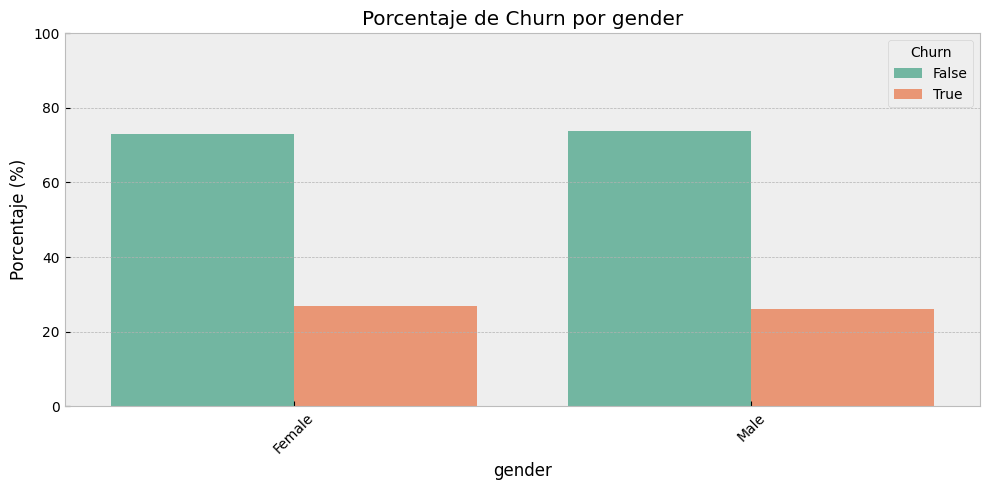


=== Análisis para variable: SeniorCitizen ===
Churn              False      True 
SeniorCitizen                      
False          76.393832  23.606168
True           58.318739  41.681261


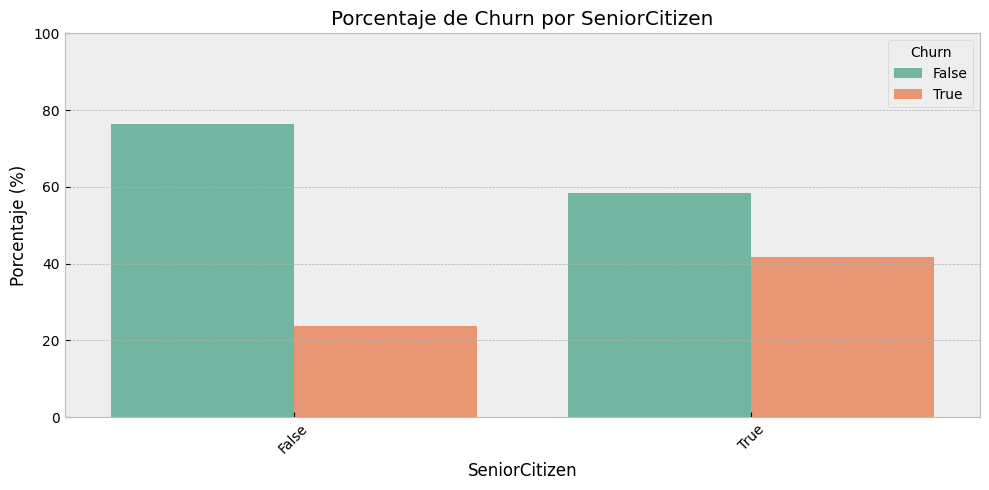


=== Análisis para variable: Partner ===
Churn        False      True 
Partner                      
False    67.042021  32.957979
True     80.335097  19.664903


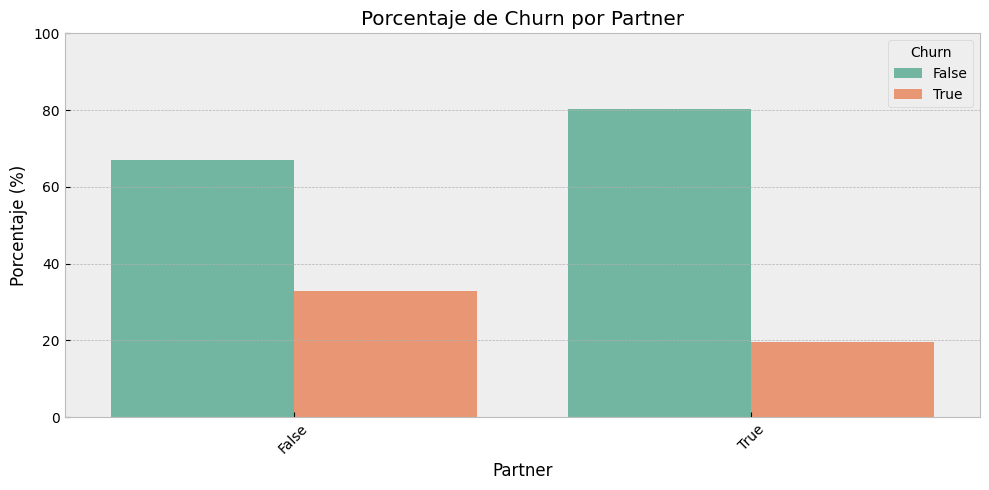


=== Análisis para variable: Dependents ===
Churn           False      True 
Dependents                      
False       68.720860  31.279140
True        84.549763  15.450237


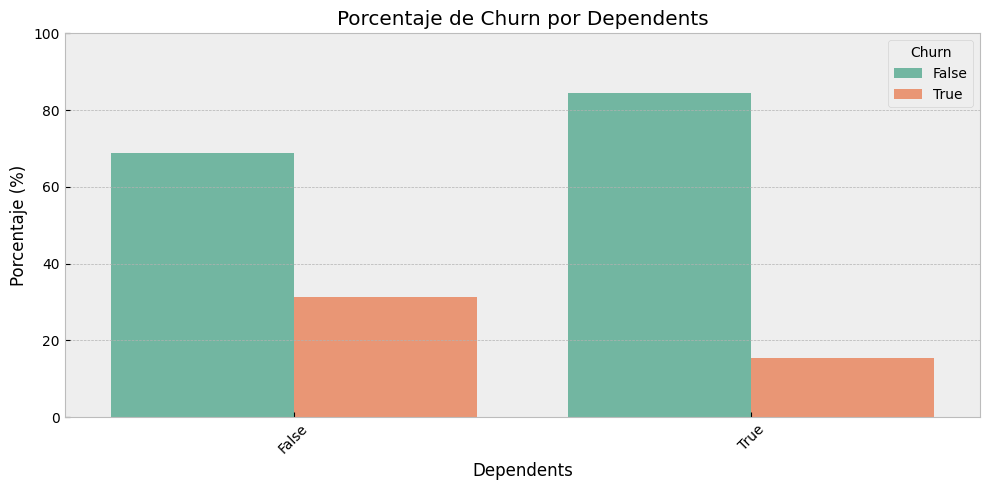


=== Análisis para variable: tenure ===
        count       mean        std  min   25%   50%   75%   max
Churn                                                           
False  5174.0  37.569965  24.113777  0.0  15.0  38.0  61.0  72.0
True   1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0


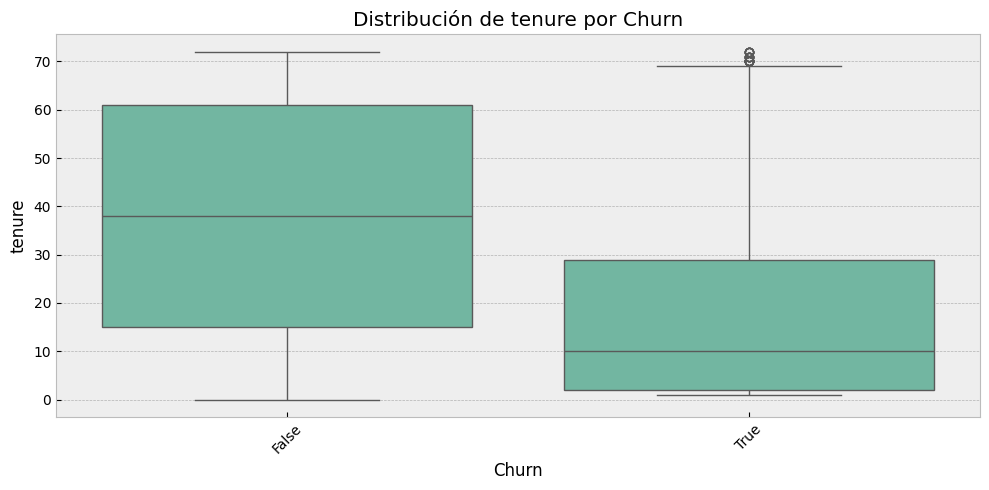


=== Análisis para variable: Contract ===
Churn               False      True 
Contract                            
Month-to-month  57.290323  42.709677
One year        88.730482  11.269518
Two year        97.168142   2.831858


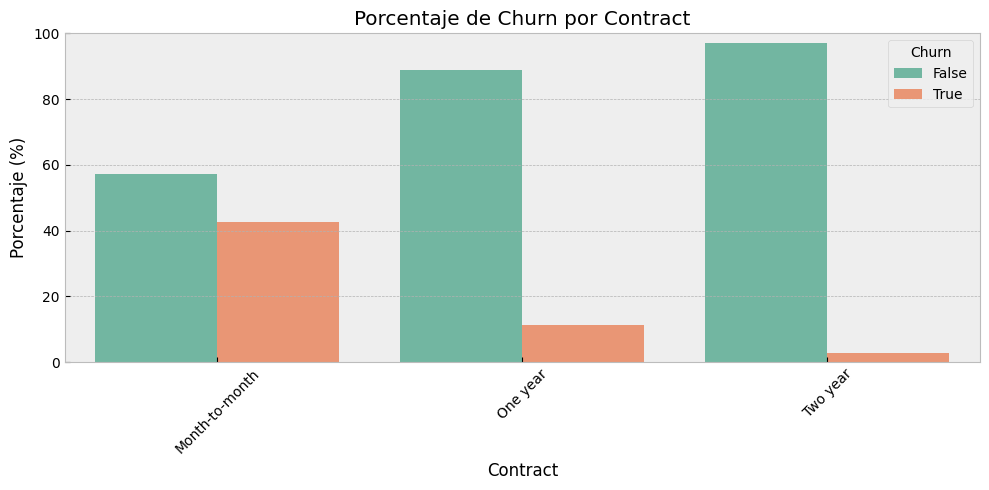


=== Análisis para variable: PaperlessBilling ===
Churn                 False      True 
PaperlessBilling                      
False             83.669916  16.330084
True              66.434908  33.565092


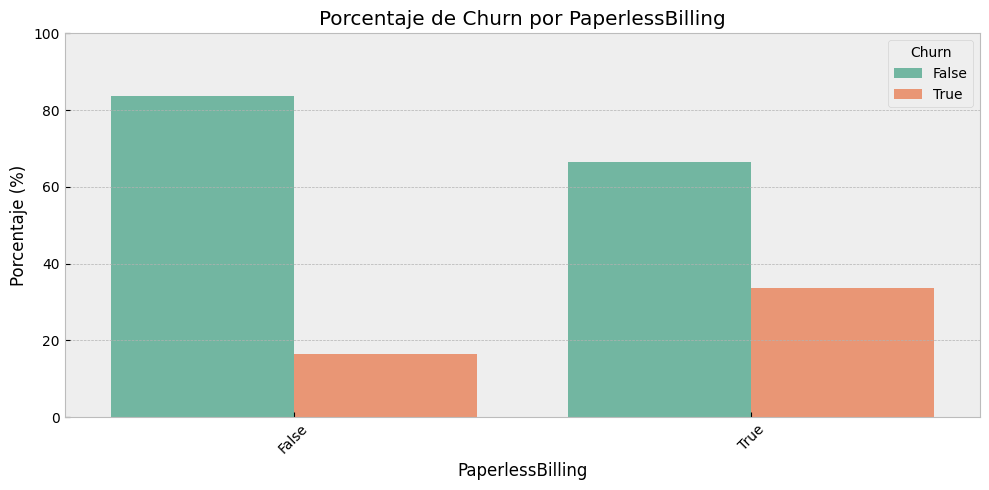


=== Análisis para variable: PaymentMethod ===
Churn                          False      True 
PaymentMethod                                  
Bank transfer (automatic)  83.290155  16.709845
Credit card (automatic)    84.756899  15.243101
Electronic check           54.714588  45.285412
Mailed check               80.893300  19.106700


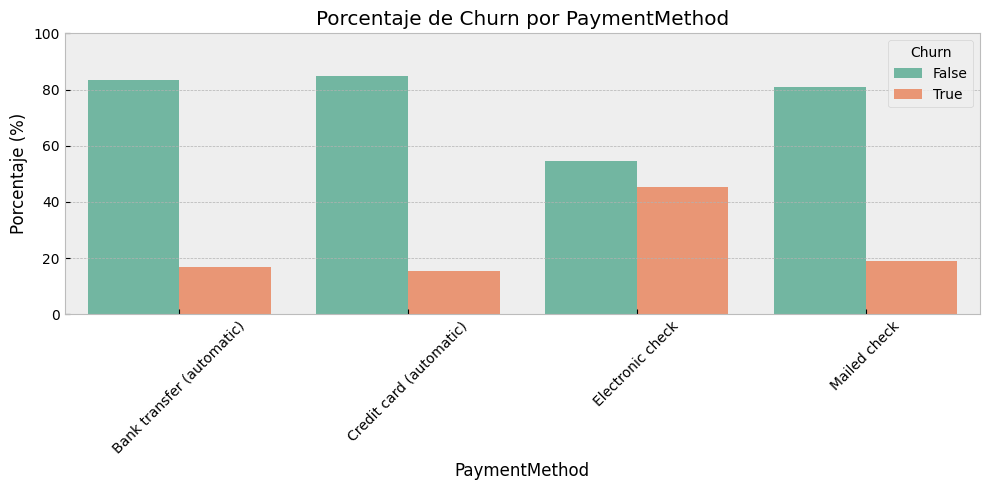


=== Análisis para variable: Charges.Monthly ===
        count       mean        std    min    25%     50%   75%     max
Churn                                                                  
False  5174.0  61.265124  31.092648  18.25  25.10  64.425  88.4  118.75
True   1869.0  74.441332  24.666053  18.85  56.15  79.650  94.2  118.35


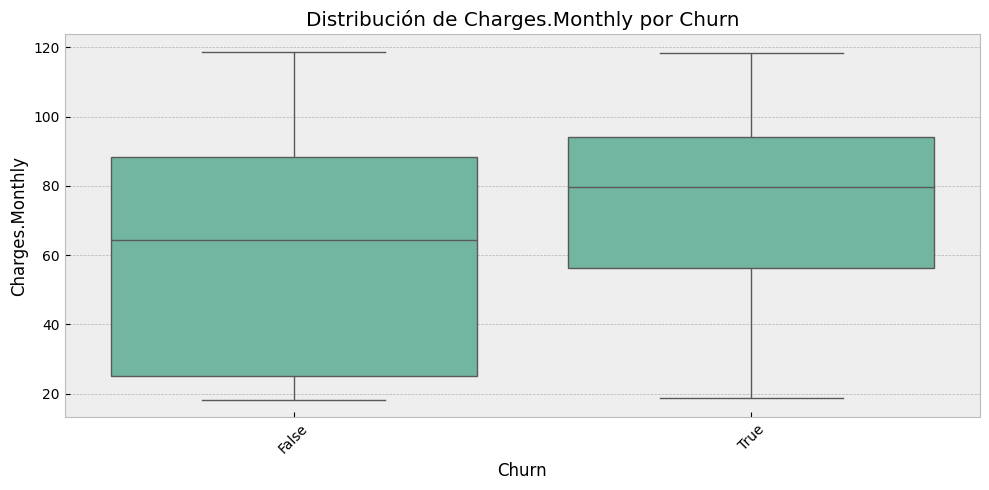


=== Análisis para variable: Charges.Total ===
        count         mean          std    min      25%      50%       75%  \
Churn                                                                        
False  5163.0  2555.344141  2329.456984  18.80  577.825  1683.60  4264.125   
True   1869.0  1531.796094  1890.822994  18.85  134.500   703.55  2331.300   

           max  
Churn           
False  8672.45  
True   8684.80  


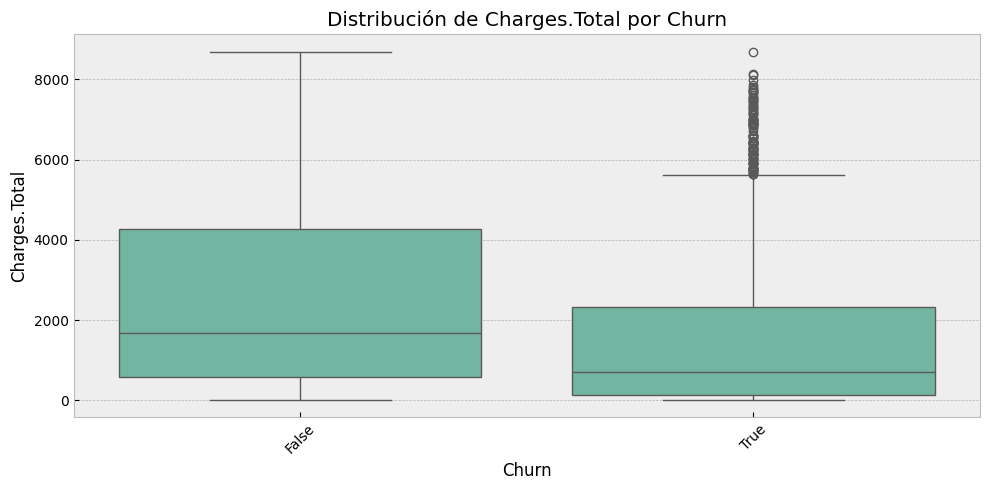


=== Análisis para variable: PhoneService ===
Churn             False      True 
PhoneService                      
False         75.073314  24.926686
True          73.290363  26.709637


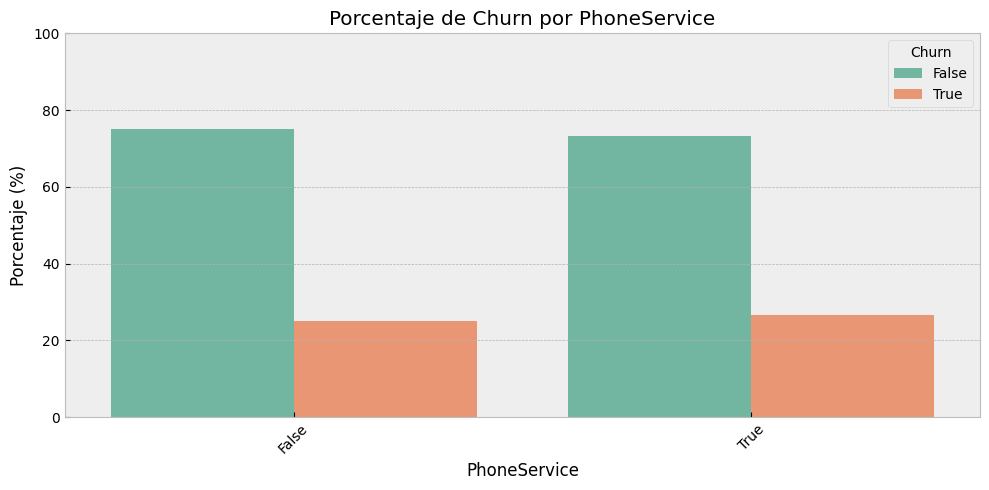


=== Análisis para variable: MultipleLines ===
Churn                 False      True 
MultipleLines                         
No                74.955752  25.044248
No phone service  75.073314  24.926686
Yes               71.390104  28.609896


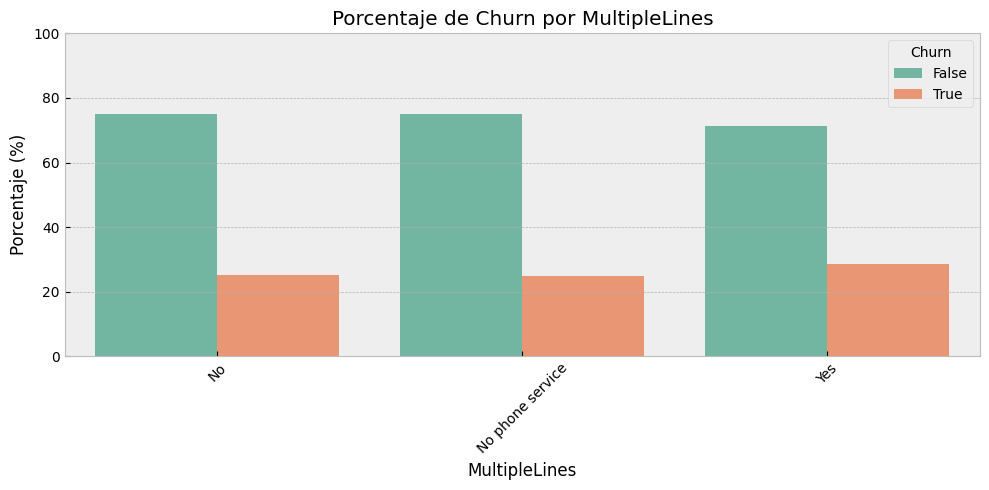


=== Análisis para variable: InternetService ===
Churn                False      True 
InternetService                      
DSL              81.040892  18.959108
Fiber optic      58.107235  41.892765
No               92.595020   7.404980


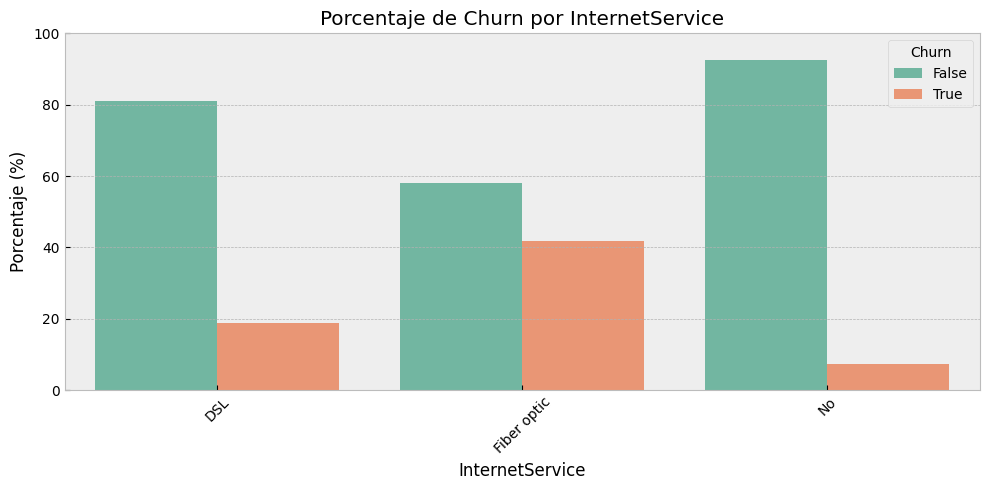


=== Análisis para variable: OnlineSecurity ===
Churn                    False      True 
OnlineSecurity                           
No                   58.233276  41.766724
No internet service  92.595020   7.404980
Yes                  85.388806  14.611194


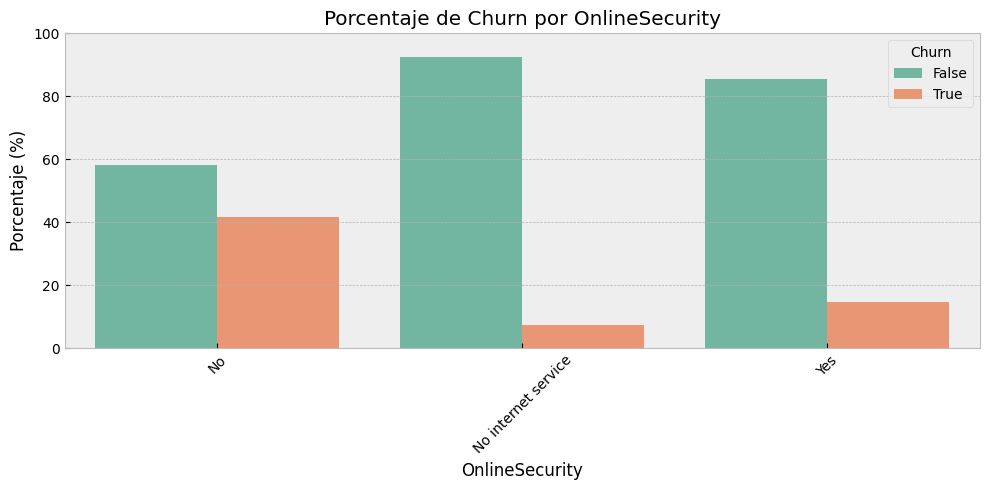


=== Análisis para variable: OnlineBackup ===
Churn                    False      True 
OnlineBackup                             
No                   60.071244  39.928756
No internet service  92.595020   7.404980
Yes                  78.468506  21.531494


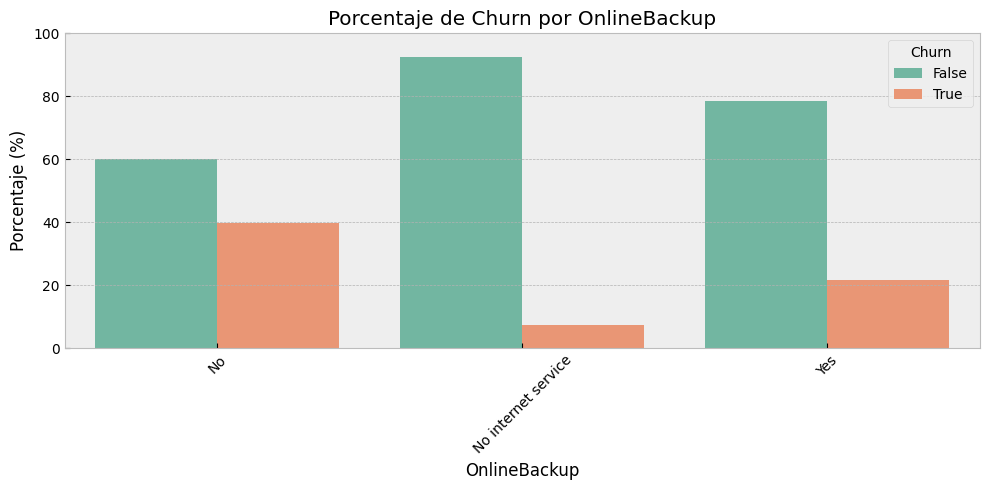


=== Análisis para variable: DeviceProtection ===
Churn                    False      True 
DeviceProtection                         
No                   60.872375  39.127625
No internet service  92.595020   7.404980
Yes                  77.497936  22.502064


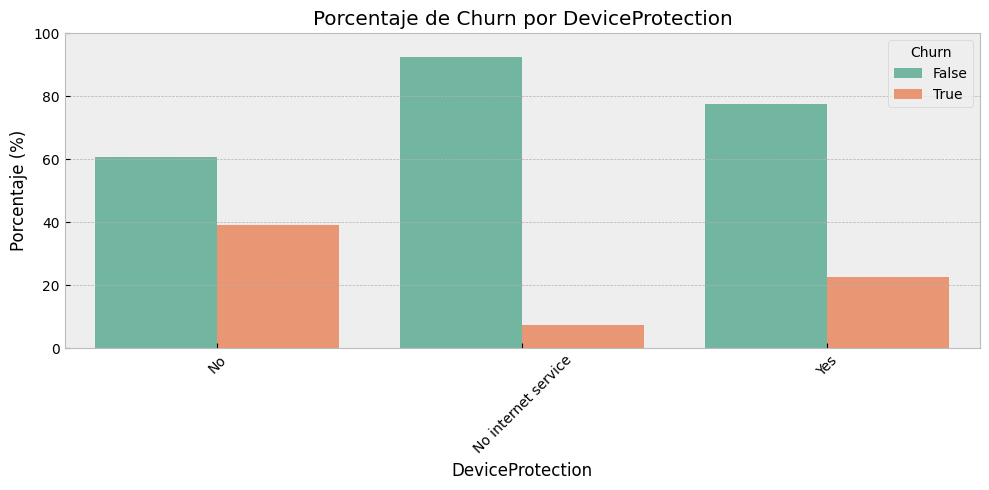


=== Análisis para variable: TechSupport ===
Churn                    False      True 
TechSupport                              
No                   58.364526  41.635474
No internet service  92.595020   7.404980
Yes                  84.833659  15.166341


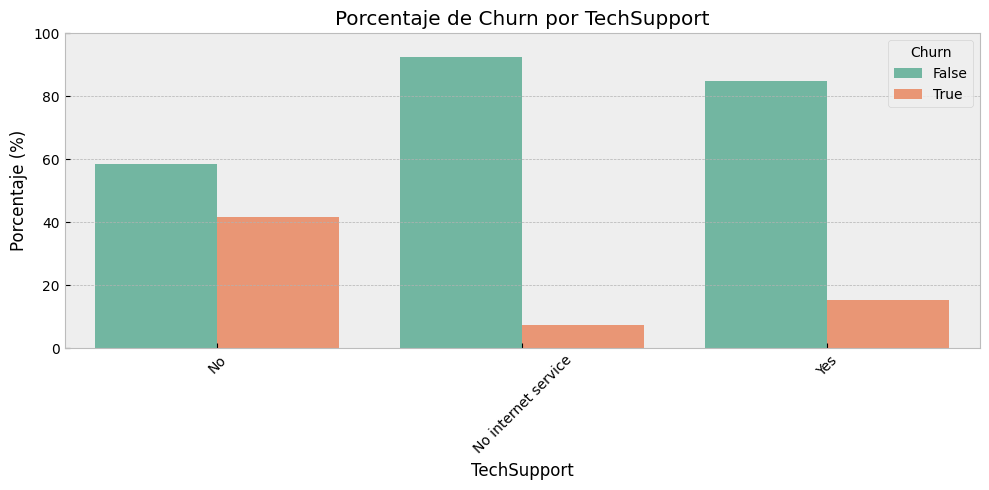


=== Análisis para variable: StreamingTV ===
Churn                    False      True 
StreamingTV                              
No                   66.476868  33.523132
No internet service  92.595020   7.404980
Yes                  69.929812  30.070188


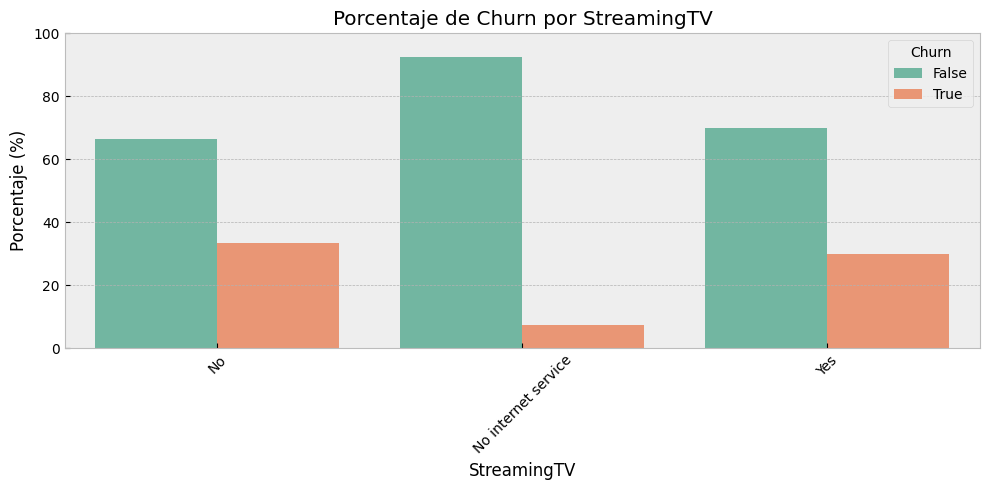


=== Análisis para variable: StreamingMovies ===
Churn                    False      True 
StreamingMovies                          
No                   66.319569  33.680431
No internet service  92.595020   7.404980
Yes                  70.058565  29.941435


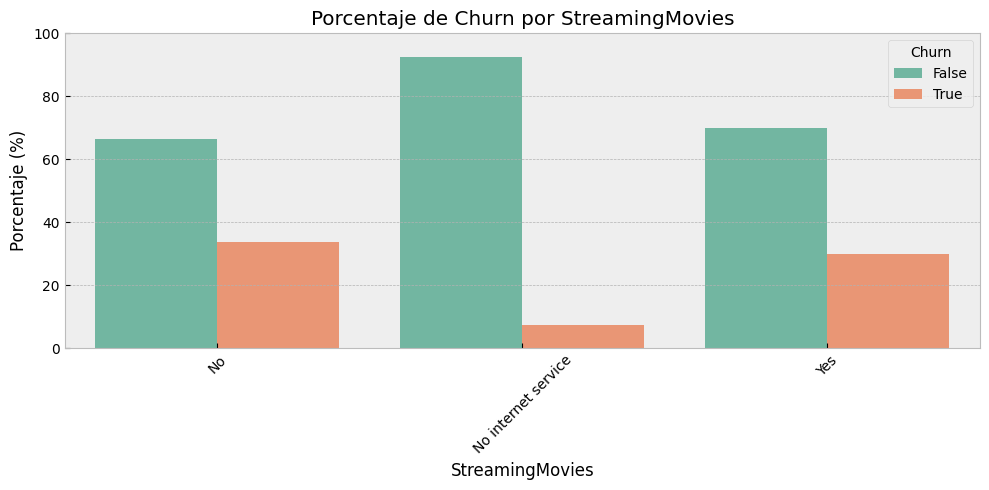

In [49]:
# Configuración de gráficos
plt.style.use('fast')
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_palette("Set2")

# Excluimos customerID y creamos lista de variables a analizar
variables = [col for col in df_clean.columns if col != 'customerID']

# Función para graficar según tipo de variable
def plot_churn_vs_variable(df, variable):
    plt.figure(figsize=(10, 5))

    if df[variable].dtype in ['int64', 'float64']:
        # Gráfico para variables numéricas
        sns.boxplot(x='Churn', y=variable, data=df)
        plt.title(f'Distribución de {variable} por Churn')
        plt.ylabel(variable)

    else:
        # Gráfico para variables categóricas
        # Calculamos porcentajes
        prop_df = (df.groupby(variable)['Churn']
                    .value_counts(normalize=True)
                    .mul(100)
                    .rename('Porcentaje')
                    .reset_index())

        sns.barplot(x=variable, y='Porcentaje', hue='Churn', data=prop_df)
        plt.title(f'Porcentaje de Churn por {variable}')
        plt.ylabel('Porcentaje (%)')
        plt.ylim(0, 100)

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Análisis para cada variable
for var in variables:
    if var != 'Churn':  # Excluimos la propia variable objetivo
        print(f"\n=== Análisis para variable: {var} ===")

        # Resumen estadístico/distribución
        if df_clean[var].dtype in ['int64', 'float64']:
            print(df_clean.groupby('Churn')[var].describe())
        else:
            print(pd.crosstab(df_clean[var], df_clean['Churn'], normalize='index')*100)

        # Generamos el gráfico
        plot_churn_vs_variable(df_clean, var)

#📄Informe final

In [50]:
"""
INFORME DE ANÁLISIS DE CHURN PARA TELECOMX
==========================================

Este documento contiene el análisis completo de evasión de clientes (churn) realizado
para TelecomX. El análisis incluye procesamiento de datos, exploración y recomendaciones
basadas en los hallazgos.
"""

# 1. RESUMEN EJECUTIVO
print("""
1. RESUMEN EJECUTIVO
--------------------
El análisis de churn reveló que el 26.5% de los clientes abandonan el servicio.
Los factores más significativos que influyen en el churn son:
- Tipo de contrato (mes a mes tiene mayor churn)
- Servicio de internet (fibra óptica tiene mayor churn)
- Antigüedad del cliente (clientes nuevos más propensos)
- Método de pago (cheque electrónico asociado a mayor churn)

Se recomienda enfocar estrategias de retención en estos segmentos de clientes.
""")

# 2. METODOLOGÍA
print("""
2. METODOLOGÍA
--------------
2.1 Fuente de Datos:
- Dataset original en JSON con 7267 registros
- 20 variables iniciales (demográficas, de servicio y de cuenta)

2.2 Procesamiento:
- Normalización de datos anidados
- Limpieza de valores faltantes/inconsistentes
- Transformación de tipos de datos
- Creación de nuevas variables (Cuentas_Diarias)

2.3 Análisis:
- Estadísticas descriptivas
- Análisis univariado y bivariado
- Visualización de patrones
- Segmentación de clientes
""")

# 3. HALLAZGOS PRINCIPALES
print("""
3. HALLAZGOS PRINCIPALES
-----------------------
3.1 Distribución de Churn:
- 26.5% tasa de churn (1,869 clientes)
- 73.5% clientes retenidos (5,174 clientes)

3.2 Factores Clave:
a) Tipo de Contrato:
   - Mes a mes: 42.7% churn
   - 1 año: 11.3% churn
   - 2 años: 2.8% churn

b) Servicio de Internet:
   - Fibra óptica: 41.2% churn
   - DSL: 18.9% churn
   - Sin internet: 7.1% churn

c) Antigüedad (tenure):
   - Media churn: 17.9 meses
   - Media no churn: 37.6 meses

d) Método de Pago:
   - Cheque electrónico: 45.3% churn
   - Transferencia bancaria: 15.2% churn

3.3 Otras Variables Significativas:
- Clientes sin servicios adicionales (seguridad, backup) tienen mayor churn
- Clientes con facturación electrónica tienen mayor churn (33.2% vs 15.7%)
- Senior Citizens tienen mayor tasa de churn (41.6% vs 23.3%)
""")

# 4. RECOMENDACIONES
print("""
4. RECOMENDACIONES
-----------------
4.1 Estrategias de Retención:
- Programa de onboarding para nuevos clientes (primeros 3 meses)
- Incentivos para cambiar de contrato mes a mes a anual
- Paquetes promocionales para servicios adicionales

4.2 Mejoras Operacionales:
- Investigar problemas con servicio de fibra óptica
- Optimizar proceso de pago por cheque electrónico
- Programa de beneficios para clientes mayores (Senior Citizens)

4.3 Monitoreo Continuo:
- Seguimiento mensual de métricas de churn
- Sistema de alerta temprana para clientes en riesgo
- Pruebas A/B para estrategias de retención
""")

# 5. CONCLUSIÓN
print("""
5. CONCLUSIÓN
------------
El análisis identifica claramente los segmentos de clientes con mayor riesgo de churn
y las variables más influyentes. Las recomendaciones propuestas están enfocadas en
abordar estos factores clave para reducir la tasa de abandono y mejorar la retención
de clientes a largo plazo.

Se sugiere implementar estas estrategias de manera gradual y medir su impacto cada
trimestre para realizar ajustes según los resultados obtenidos.
""")


1. RESUMEN EJECUTIVO
--------------------
El análisis de churn reveló que el 26.5% de los clientes abandonan el servicio. 
Los factores más significativos que influyen en el churn son:
- Tipo de contrato (mes a mes tiene mayor churn)
- Servicio de internet (fibra óptica tiene mayor churn)
- Antigüedad del cliente (clientes nuevos más propensos)
- Método de pago (cheque electrónico asociado a mayor churn)

Se recomienda enfocar estrategias de retención en estos segmentos de clientes.


2. METODOLOGÍA
--------------
2.1 Fuente de Datos:
- Dataset original en JSON con 7267 registros
- 20 variables iniciales (demográficas, de servicio y de cuenta)

2.2 Procesamiento:
- Normalización de datos anidados
- Limpieza de valores faltantes/inconsistentes
- Transformación de tipos de datos
- Creación de nuevas variables (Cuentas_Diarias)

2.3 Análisis:
- Estadísticas descriptivas
- Análisis univariado y bivariado
- Visualización de patrones
- Segmentación de clientes


3. HALLAZGOS PRINCIPALES
---